In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
with open('traffic-signs-data/train.p', mode='rb') as training_data:
    train = pickle.load(training_data)
with open('traffic-signs-data/valid.p', mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open('traffic-signs-data/test.p', mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_validation.shape

(4410, 32, 32, 3)

In [7]:
y_validation.shape

(4410,)

In [8]:
X_test.shape

(12630, 32, 32, 3)

In [9]:
y_test.shape

(12630,)

1


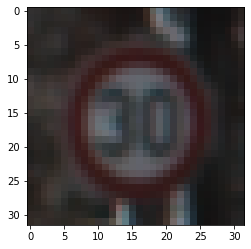

In [10]:
i = 2333
plt.imshow(X_train[i])
print(y_train[i])

17

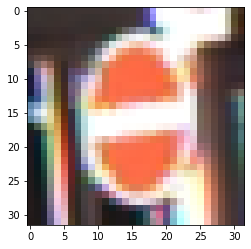

In [11]:
i = 4000
plt.imshow(X_validation[i])
y_validation[i]

25

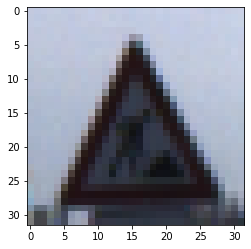

In [12]:
i = 4000
plt.imshow(X_test[i])
y_test[i]

In [13]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [14]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)

In [15]:
X_train_gray.shape

(34799, 32, 32, 1)

In [16]:
X_test_gray.shape

(12630, 32, 32, 1)

In [17]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [18]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

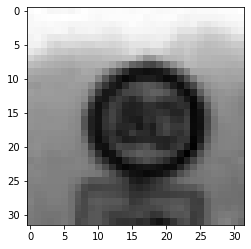

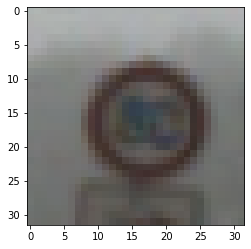

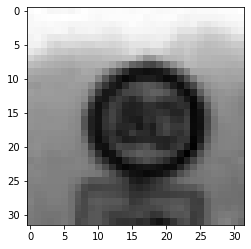

In [19]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [21]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))
cnn_model.add(Dense(units=84, activation='relu'))
cnn_model.add(Dense(units=43, activation='softmax'))

In [22]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [23]:
history =  cnn_model.fit(X_train_gray_norm, 
             y_train,
             batch_size=500,
             epochs=50,
             verbose=1,
             validation_data=(X_validation_gray_norm, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 17s 495us/step - loss: 3.2043 - accuracy: 0.1642 - val_loss: 2.8685 - val_accuracy: 0.2574
Epoch 2/50
34799/34799 [==============================] - 17s 478us/step - loss: 1.8331 - accuracy: 0.4977 - val_loss: 1.6987 - val_accuracy: 0.5166
Epoch 3/50
34799/34799 [==============================] - 17s 489us/step - loss: 1.0687 - accuracy: 0.6908 - val_loss: 1.1816 - val_accuracy: 0.6488
Epoch 4/50
34799/34799 [==============================] - 18s 510us/step - loss: 0.7552 - accuracy: 0.7854 - val_loss: 0.9205 - val_accuracy: 0.7277
Epoch 5/50
34799/34799 [==============================] - 17s 500us/step - loss: 0.5944 - accuracy: 0.8360 - val_loss: 0.8282 - val_accuracy: 0.7662
Epoch 6/50
34799/34799 [==============================] - 17s 502us/step - loss: 0.4897 - accuracy: 0.8673 - val_loss: 0.7482 - val_accuracy: 0.7891
Epoch 7/50
34799/34799 [==============================] -

In [25]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 3s 264us/step
Test Accuracy: 0.8422011137008667


In [27]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [28]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
va_loss = history.history['val_loss']


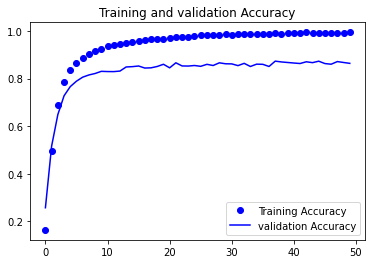

In [32]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()

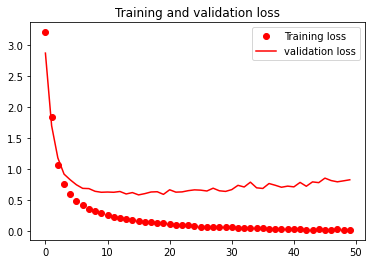

In [34]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, va_loss, 'r', label='validation loss')
plt.title('Training and validation loss')
plt.legend()

In [35]:
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
y_true = y_test

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)

<AxesSubplot:>

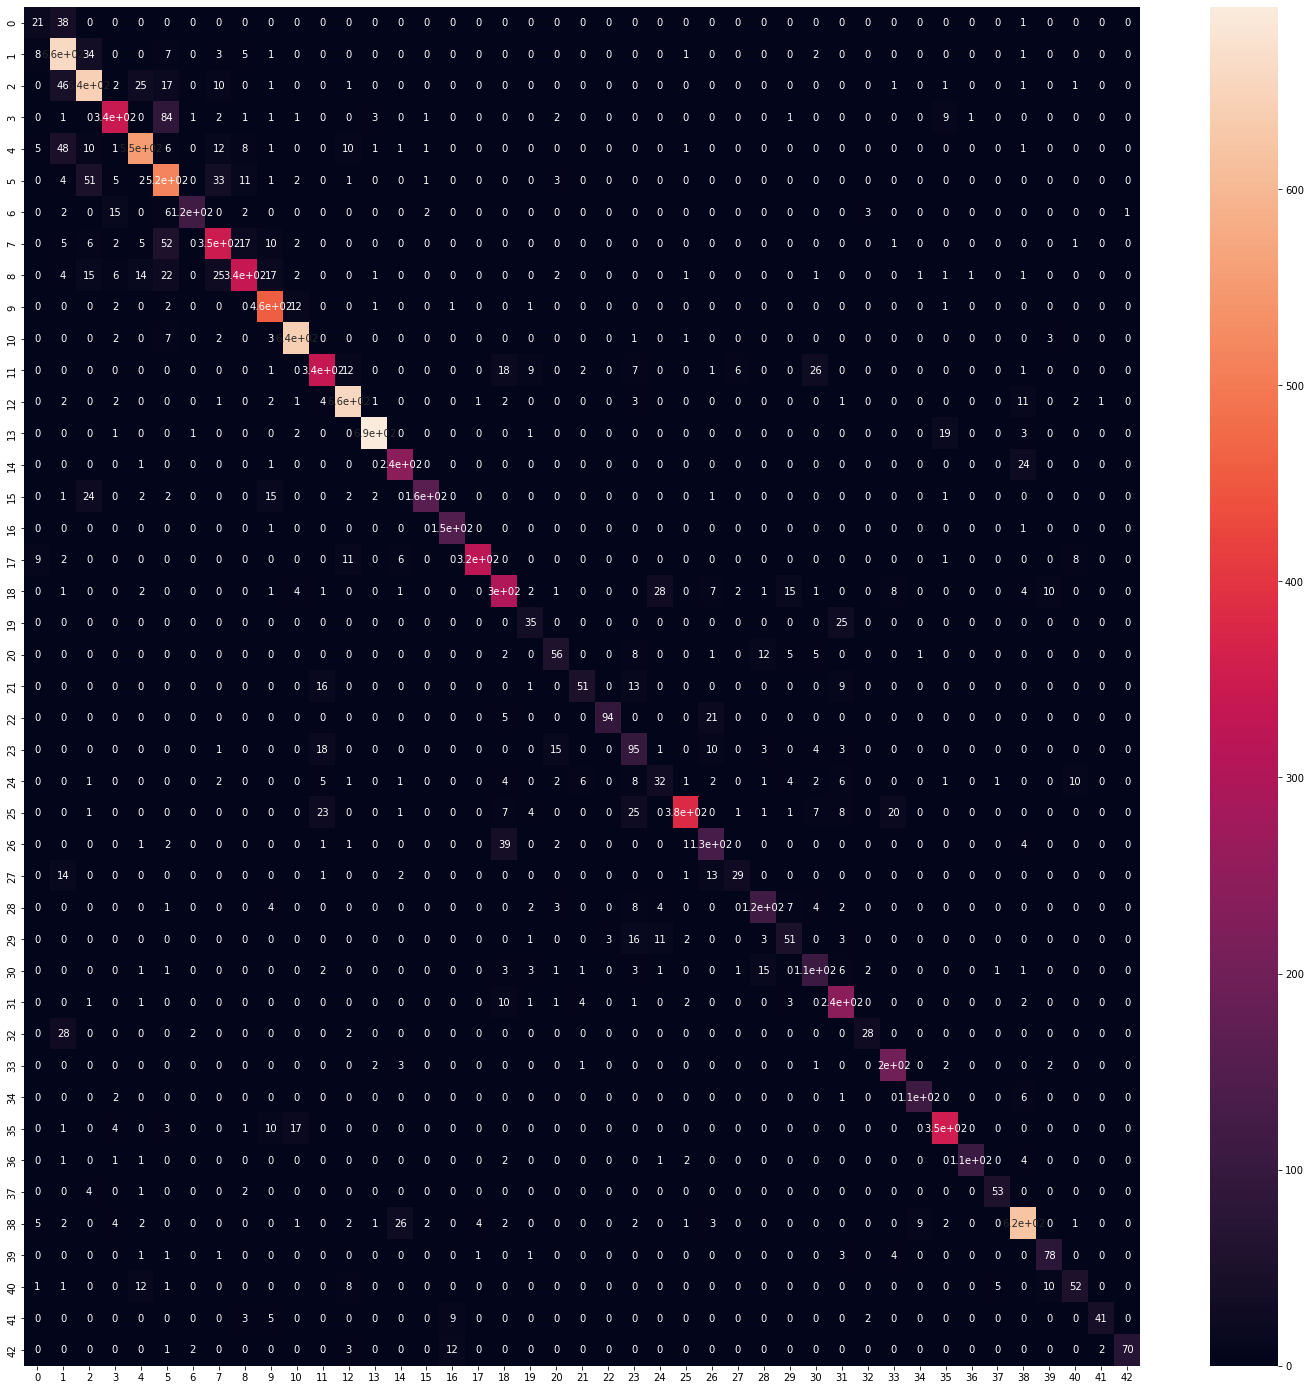

In [38]:
plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True)

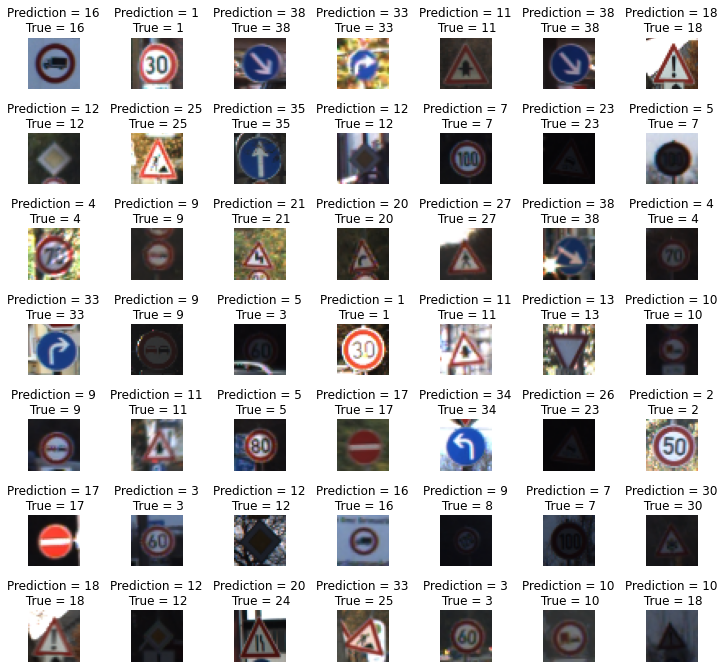

In [43]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W): 
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=1)
    